In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("conductivity.csv")

def rename_cols(name):
    if "um Measured Grain Size" in name:
        return name.split()[0] + " size"
    elif "um Measured Conductivity" in name:
        return name.split()[0] + " cond"
    return name
df.rename(columns=rename_cols, inplace=True)

SIZES = list(map(lambda x: int(x.split()[0]), df.columns[::2]))
COLORS = mpl.colormaps["viridis"](np.linspace(0.8,0.2,len(SIZES)))

print(f"Grain sizes: {SIZES}")
df.head()

Grain sizes: [30, 50, 100, 150, 200]


,30 size,30 cond,50 size,50 cond,100 size,100 cond,150 size,150 cond,200 size,200 cond
0,26.385649,141705.1825,49.769497,825209.8877,105.342663,1440434.048,153.800434,2414484.771,197.789541,3330091.806
1,29.228651,148833.0212,52.697096,847810.3431,104.830058,1450762.442,153.095156,2456585.770,197.951566,3044628.916
2,30.453191,118277.3573,47.129357,812651.5561,112.139189,1406715.305,150.053214,2316088.346,191.682346,2584906.410
3,32.192275,164828.1108,46.260877,854437.4576,101.684618,1410339.581,146.349020,2330692.597,198.273324,3433739.241
4,34.530680,121587.3704,56.383056,817096.2876,101.932903,1325916.462,152.059725,2332950.006,188.299310,3358299.685


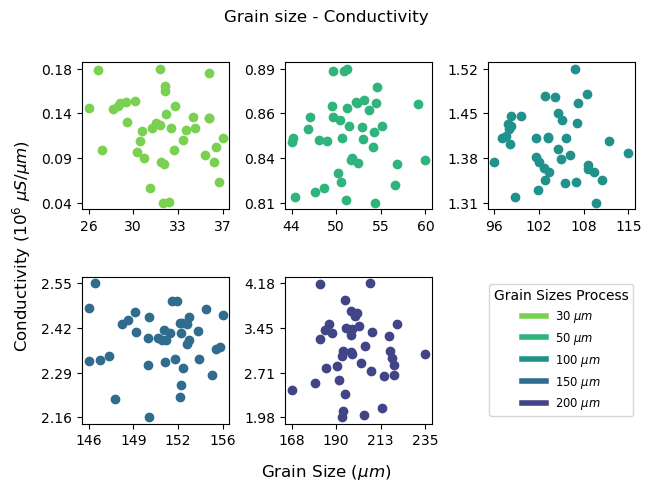

In [3]:
fig, axs = plt.subplots(2, 3, layout="constrained")

for i, size in enumerate(SIZES):
    ax = axs[i // 3, i % 3]
    ax.set_yticks(np.linspace(min(df[f"{size} cond"]), max(df[f"{size} cond"]), 4))
    ax.set_xticks(np.linspace(min(df[f"{size} size"]), max(df[f"{size} size"]), 4))
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f"{x*1e-6:.2f}"))
    ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"))
    ax.scatter(df[f"{size} size"], df[f"{size} cond"], color=COLORS[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable="box")

axs[-1,-1].legend(handles=[mpl.lines.Line2D([0], [0], color=COLORS[i], lw=4) for i in range(len(SIZES))],
                  labels=[f"{size} " + r"$\mu m$" for size in SIZES],
                  title="Grain Sizes Process", loc='center', fontsize='small')
axs[-1,-1].axis('off')

fig.supxlabel(r"Grain Size ($\mu m $)")
fig.supylabel(r"Conductivity ($10^6\ \mu S/\mu m$)")
plt.suptitle("Grain size - Conductivity")
plt.show()

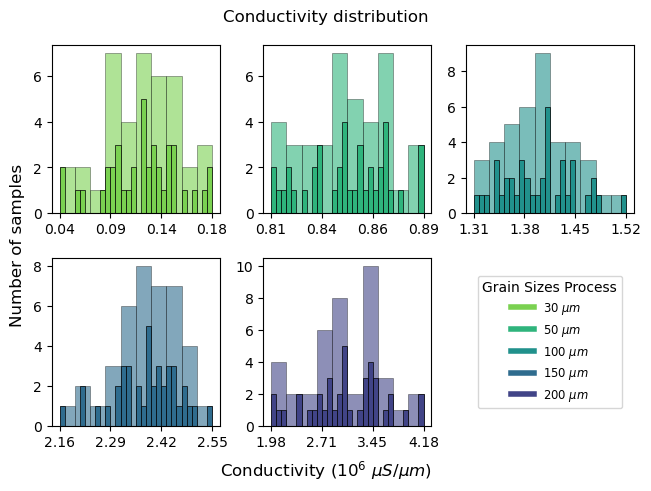

In [4]:
fig, axs = plt.subplots(2, 3, layout="constrained")

for i, size in enumerate(SIZES):
    ax = axs[i // 3, i % 3]
    ax.hist(df[f"{size} cond"], color=COLORS[i], bins=10, edgecolor="black", alpha=0.6, linewidth=0.4)
    ax.hist(df[f"{size} cond"], color=COLORS[i], bins=30, edgecolor="black", linewidth=0.5)
    ax.set_xticks(np.linspace(min(df[f"{size} cond"]), max(df[f"{size} cond"]), 4))
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"))
    ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f"{x*1e-6:.2f}"))
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable="box")

axs[-1,-1].legend(handles=[mpl.lines.Line2D([0], [0], color=COLORS[i], lw=4) for i in range(len(SIZES))],
                  labels=[f"{size} " + r"$\mu m$" for size in SIZES],
                  title="Grain Sizes Process", loc='center', fontsize='small')
axs[-1,-1].axis('off')


fig.supylabel(r"Number of samples")
fig.supxlabel(r"Conductivity ($10^6\ \mu S/\mu m$)")
plt.suptitle("Conductivity distribution")
plt.show()

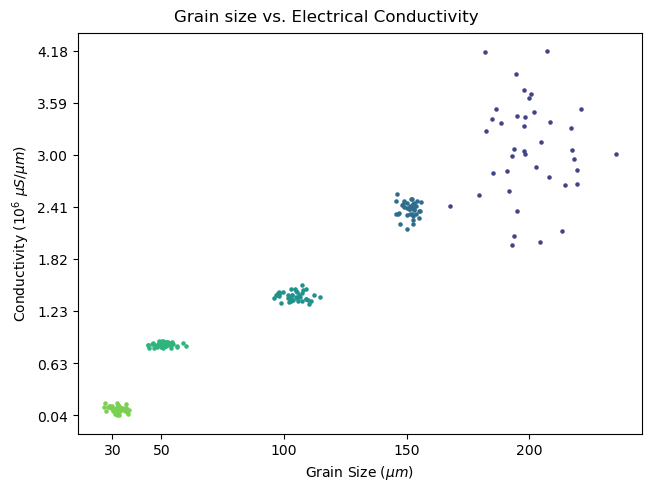

In [5]:
fig = plt.figure(layout='constrained')
ax = fig.subplots()

for i, size in enumerate(SIZES):
    plt.scatter(df[f"{size} size"], df[f"{size} cond"], color=COLORS[i], s=5)

ax.set_yticks(np.linspace(min(df[f"{SIZES[0]} cond"]), max(df[f"{SIZES[-1]} cond"]), 8))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f"{x*1e-6:.2f}"))
ax.set_xticks(SIZES)
plt.xlabel(r"Grain Size ($\mu m $)")
plt.ylabel(r"Conductivity ($10^6\ \mu S/\mu m$)")
plt.suptitle("Grain size vs. Electrical Conductivity")
plt.show()

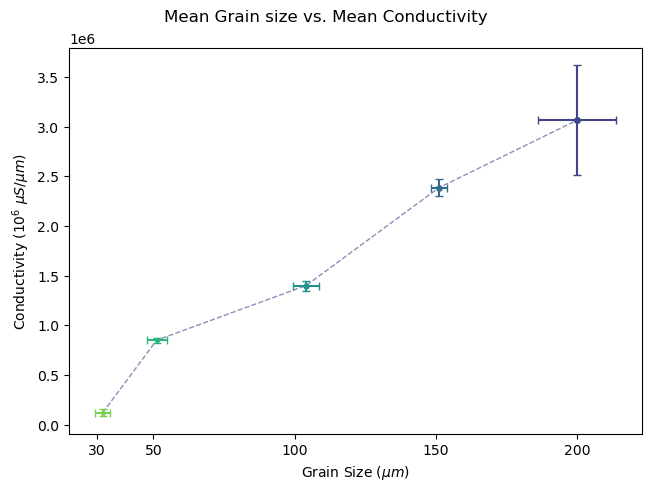

In [6]:
fig = plt.figure(layout='constrained')
ax = fig.subplots()

plt.plot(df.iloc[:,::2].mean(), df.iloc[:,1::2].mean(), "--", alpha=0.6, color=COLORS[-1], linewidth=1)

for i, size in enumerate(SIZES):
    plt.errorbar(df[f"{size} size"].mean(), df[f"{size} cond"].mean(), 
                 xerr=df[f"{size} size"].std(), yerr=df[f"{size} cond"].std(), 
                 marker='o', capsize=3, markersize=np.log(size) * 4 / np.log(SIZES[-1]), color=COLORS[i])

ax.set_xticks(SIZES)
plt.xlabel(r"Grain Size ($\mu m $)")
plt.ylabel(r"Conductivity ($10^6\ \mu S/\mu m$)")
plt.suptitle("Mean Grain size vs. Mean Conductivity")

plt.show()